## Tensorflow - Simple Harmonic Motion (SHM)   

In [6]:
# Shebongled
import tensorflow as tf
import numpy as np
from numpy.fft import fft, fftfreq, rfft, fftshift
import matplotlib.pyplot as plt
import logging

import Helper as hp

#### Damped SHM  

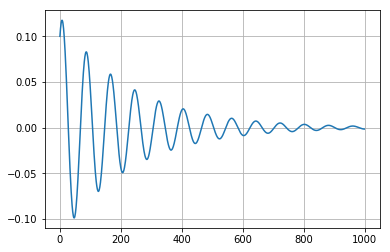

In [9]:
r = 0.035
s = 0.5
m = 0.2
inits = [0.1, 0.1]

def dampedshm_equation(state, t):
    x, y = tf.unstack(state)
    dx = y
    dy = (-r*y - s*x)/m
    return tf.stack([dx, dy])

x, y = hp.generate_tensorflowsession(dampedshm_equation, inits)

hp.plotface(x, grid=1)

#### Coupled Damped SHM - Beats

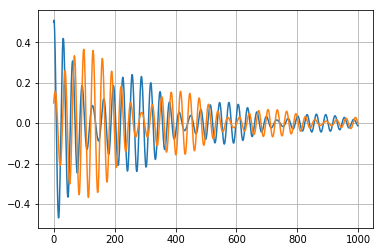

In [10]:
b = 0.007
k1 = 0.27
k2 = 0.027
m = 0.25
inits = [0.5, 0.1, 0.1, 0.1]

def coupledoscillators_equation(state, t):
    x, y, x1, y1 = tf.unstack(state)
    dx = y
    dy = -(k1/m)*x + (k2/m)*x1 - (b/m)*y
    dx1 = y1
    dy1 = (k2/m)*x - (k1/m)*x1 - (b/m)*y1
    return tf.stack([dx, dy, dx1, dy1])

x, y, x1, y1 = hp.generate_tensorflowsession(coupledoscillators_equation, inits, tfinal=200)

plt.plot(x)
plt.plot(x1)
plt.grid()